In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import yfinance as yf
import hvplot.pandas
import mplfinance as mpf
from prophet import Prophet

In [2]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
#Getting BTC Dataframe

# Define the ticker symbol for Bitcoin
btc_symbol = "BTC-USD"

# Specify the date range for the past 10 years
start_date = "2013-10-09"
end_date = "2025-12-04"

# Use yfinance to get Bitcoin data for the specified date range
btc_data = yf.download(btc_symbol, start=start_date, end=end_date, progress=False)

ohlc_btc = btc_data.copy()

# Extract the "Close" column and create a DataFrame
btc_df = btc_data[["Close"]]

# Print the first few rows of the DataFrame
print(btc_df.head())
print(btc_df.tail())

                 Close
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014
                   Close
Date                    
2024-02-01  43075.773438
2024-02-02  43185.859375
2024-02-03  42992.250000
2024-02-04  42583.582031
2024-02-05  42644.851562


In [4]:
# Plot the closing prices for Bitcoin
btc_df.hvplot.line(
    title="Bitcoin Closing Prices",
    xlabel="Date",
    ylabel="Closing Price ($)",
    width=1000,
    height=400,
)


:Curve   [Date]   (Close)

In [8]:
# Preprocessing Data
bitcoin_data = btc_df.copy()
bitcoin_data = bitcoin_data.dropna()
bitcoin_data.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [9]:
# Show the last five rows
bitcoin_data.tail()

,Close
Date,
2024-02-01,43075.773438
2024-02-02,43185.859375
2024-02-03,42992.250000
2024-02-04,42583.582031
2024-02-05,42644.851562


In [10]:
cdt = df.tail(61)

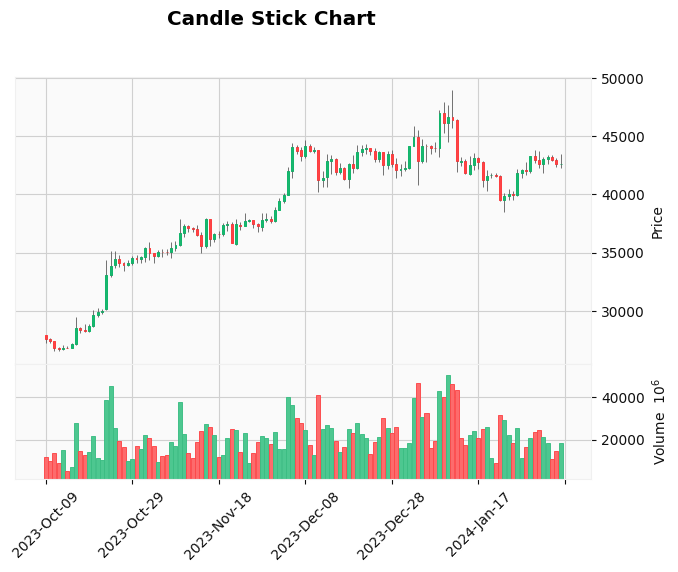

In [11]:
# Suppress the type error with try, except block
try: 
    # Candle Stick Chart
    fig,axes = mpf.plot(ohlc_btc.tail(120), type = "candle", style = "yahoo", title = "Candle Stick Chart", ylabel = "Price", volume = True)
   # Show results
    mpf.show()
except:
    pass


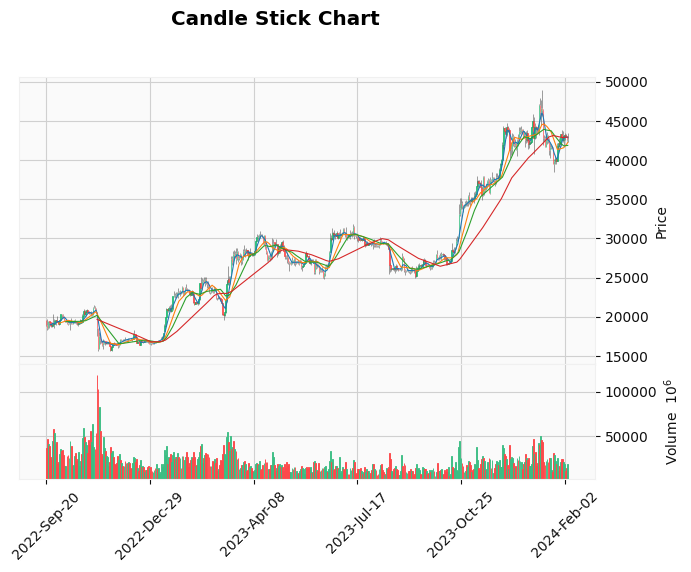

In [12]:
# Suppress the type error with try, except block
try:
    # Candle Stick Chart with MA
    fig,axes = mpf.plot(ohlc_btc.tail(504), type = "candle", style = "yahoo", title = "Candle Stick Chart", ylabel = "Price", volume = True, mav = (5,13,20,50))
   # Show results
    mpf.show()
except:
    pass

In [13]:
btc_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-02-01,42569.761719,43243.167969,41879.191406,43075.773438,43075.773438,21423953779
2024-02-02,43077.640625,43422.488281,42584.335938,43185.859375,43185.859375,18603843039
2024-02-03,43184.964844,43359.941406,42890.808594,42992.250000,42992.250000,11169245236


In [14]:
#Reset Index
btc_data.reset_index(inplace= True)
btc_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3424,2024-02-01,42569.761719,43243.167969,41879.191406,43075.773438,43075.773438,21423953779
3425,2024-02-02,43077.640625,43422.488281,42584.335938,43185.859375,43185.859375,18603843039
3426,2024-02-03,43184.964844,43359.941406,42890.808594,42992.250000,42992.250000,11169245236
3427,2024-02-04,42994.941406,43097.644531,42374.832031,42583.582031,42583.582031,14802225490


In [15]:
# Isolate the closing price and the date
data = btc_data[["Date", "Close"]]
#Rename columns to align with the Prophet model
data= data.rename(columns={"Date":"ds", "Close": "y"})
data


,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3424,2024-02-01,43075.773438
3425,2024-02-02,43185.859375
3426,2024-02-03,42992.250000
3427,2024-02-04,42583.582031


In [16]:
#Initilizing and fit the prophet model
model= Prophet()
model.fit(data)

17:41:46 - cmdstanpy - INFO - Chain [1] start processing
17:41:46 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Make predictions
future_trends= model.make_future_dataframe(periods=1000,freq="H")
#View the last five rows of the dataframe
future_trends.tail()


,ds
4424,2024-03-17 12:00:00
4425,2024-03-17 13:00:00
4426,2024-03-17 14:00:00
4427,2024-03-17 15:00:00
4428,2024-03-17 16:00:00


In [18]:
#Make predictions for the trend using the future trend dataframe
forecast_trends= model.predict(future_trends)
# View the last five rows of the dataframe
forecast_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4424,2024-03-17 12:00:00,31395.672335,27573.262515,40408.576740,31222.560678,31554.279032,2361.367851,2361.367851,2361.367851,14.488720,14.488720,14.488720,2346.879131,2346.879131,2346.879131,0.0,0.0,0.0,33757.040186
4425,2024-03-17 13:00:00,31395.936338,27068.821897,40494.237337,31222.613390,31555.240270,2366.376361,2366.376361,2366.376361,15.653849,15.653849,15.653849,2350.722512,2350.722512,2350.722512,0.0,0.0,0.0,33762.312700
4426,2024-03-17 14:00:00,31396.200341,26874.417487,40222.284377,31222.666101,31556.201508,2371.222256,2371.222256,2371.222256,16.655484,16.655484,16.655484,2354.566773,2354.566773,2354.566773,0.0,0.0,0.0,33767.422598
4427,2024-03-17 15:00:00,31396.464344,27384.997862,39680.347502,31222.718813,31557.162746,2375.892904,2375.892904,2375.892904,17.481106,17.481106,17.481106,2358.411798,2358.411798,2358.411798,0.0,0.0,0.0,33772.357248
4428,2024-03-17 16:00:00,31396.728347,26926.771736,39691.391023,31222.771525,31558.123984,2380.378022,2380.378022,2380.378022,18.120551,18.120551,18.120551,2362.257472,2362.257472,2362.257472,0.0,0.0,0.0,33777.106369


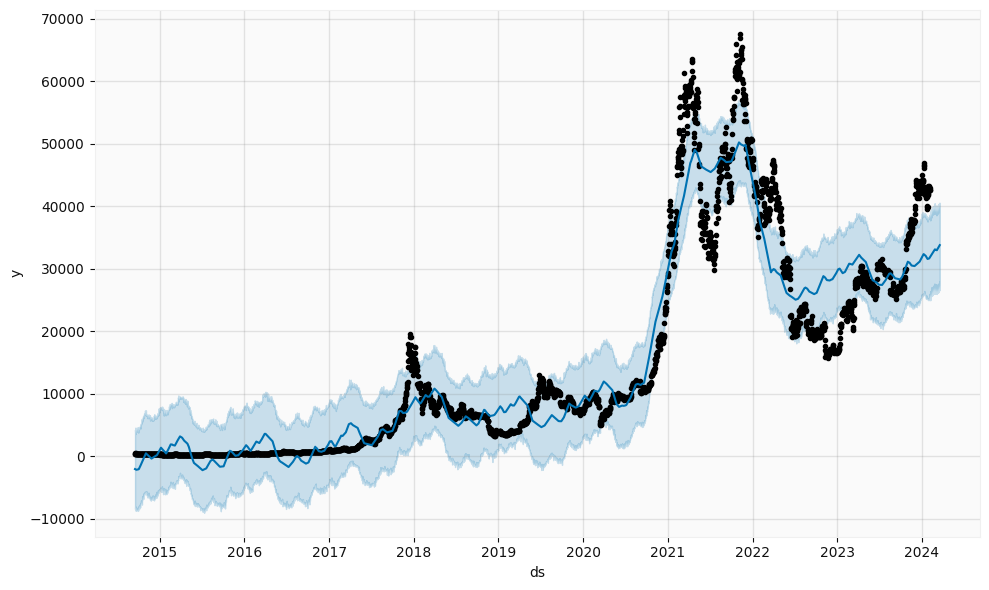

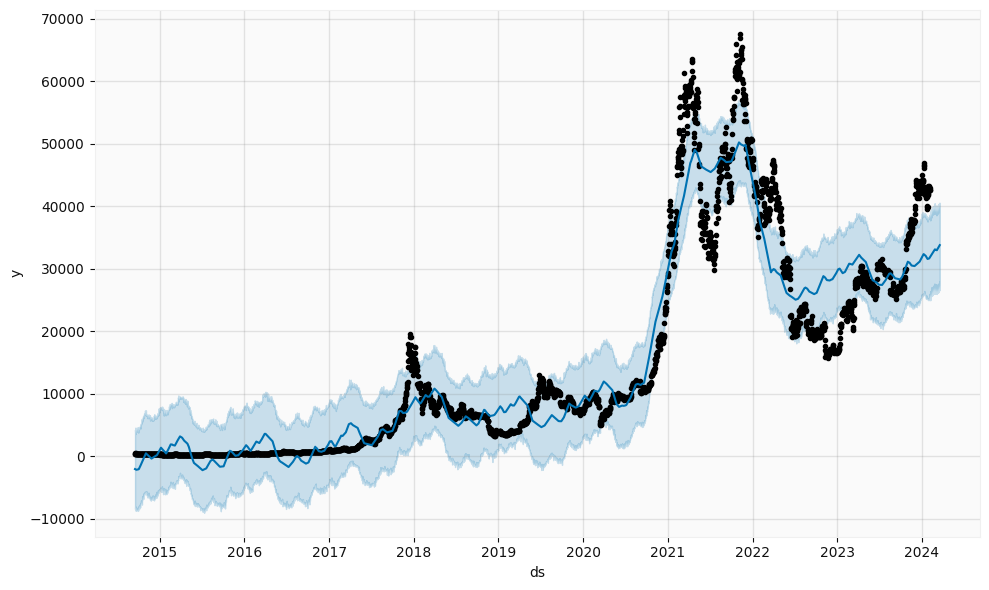

In [19]:
#Plot the prophet prediction for bitcoin data
model.plot(forecast_trends)


In [20]:
#Set the index to the DS datetime column
forecast_trends= forecast_trends.set_index("ds")
#View only the yhat, yhat_lower, and the yhat_upper columns from the Dataframe
forecast_trends[["yhat","yhat_lower","yhat_upper"]].head()

,yhat,yhat_lower,yhat_upper
ds,,,
2014-09-17,-2056.697345,-8437.647257,4235.658912
2014-09-18,-2128.033025,-7994.889455,3727.913915
2014-09-19,-2130.482721,-8515.284365,4587.457176
2014-09-20,-2130.807907,-8734.875459,3561.594776
2014-09-21,-2151.237626,-8537.120116,3909.205679


#Forecast Legend

**yhat** : most likely case

**yhat_lower** : worst case

**yhat_upper** : best case


In [21]:
#Visulize forecast trends using hvplot
forecast_trends[["yhat","yhat_lower","yhat_upper"]].iloc[-1000:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

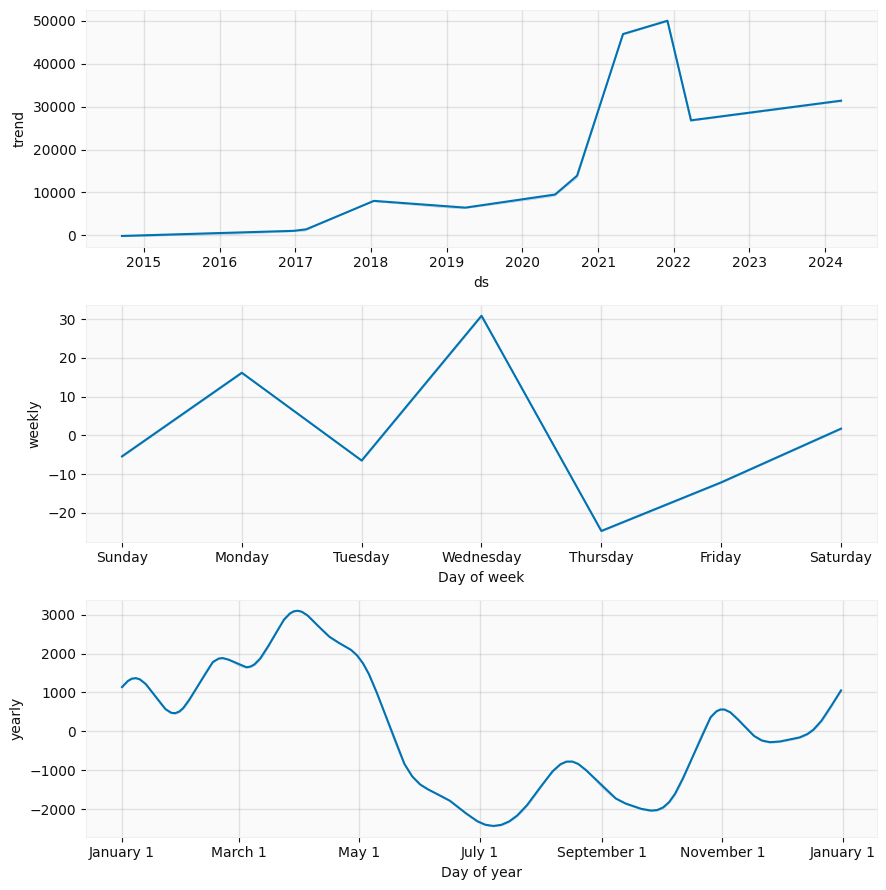

In [22]:
#reset the index in the forecast dataframe
forecast_trends= forecast_trends.reset_index()
#use the plot components function to visulize the forecast results
figures_trend= model.plot_components(forecast_trends)

In [156]:
#forecast_trends.ds.apply(lambda x: x.strftime"%Y-%m-%d %H:%M:%S") 

In [157]:
#create a forecast quoter dataframe for the q4 period of 2023
#forecast_quarter= forecast_trends["2023-10-01":"2023-12-31"]["yhat_upper","yhat_lower","yhat"]
#upate the column names for forecast_quoter
#forecast_quarter=forecast_quarter.rename(columns={"yhat_upper":"Best Case","yhat_lower":"Worst Case", "yhat":"Most Lilely Case"})
#View the last five rows for forecast_quarter
#forecast_quarter.tail()
